# Вариант 7
* X1 ~ N(-1, 2), n1 = 100
* X2 ~ R(-2, 0), n2 = 100


In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats as st
from typing import Dict, Tuple, List

## 1. Исходные данные

In [4]:
def describe_distribution(distribution, name) -> Dict[str, Dict[str, float]]:
    description = st.describe(distribution)

    return {
            name: {
                      'mean': description[2],
                      'variance': description[3],
                      'deviation': np.sqrt(description[3])
                  }
           }

In [79]:
n1 = 100
x = st.distributions.norm(-1, 2).rvs(n1, random_state=42)

n2 = 100
y = st.distributions.uniform.rvs(loc=-2, scale=2, size=n2, random_state=42)

In [6]:
describe_distribution(x, 'X1 ~ N(-1, 2)'), describe_distribution(y, 'X2 ~ R(-2, 0)')


({'X1 ~ N(-1, 2)': {'mean': -1.2076930347881878,
   'variance': 3.2990795745206403,
   'deviation': 1.8163368560156017}},
 {'X2 ~ R(-2, 0)': {'mean': -1.0596385132435813,
   'variance': 0.3539997986649662,
   'deviation': 0.5949788220306386}})

In [13]:
st.pearsonr(x, y), st.spearmanr(x, y), st.kendalltau(x, y)

(PearsonRResult(statistic=0.13208970930121833, pvalue=0.19018281336949514),
 SignificanceResult(statistic=0.12888088808880888, pvalue=0.20126973271458018),
 SignificanceResult(statistic=0.09010101010101011, pvalue=0.18409880519630106))

## 2. Визуальное представление двумерной выборки

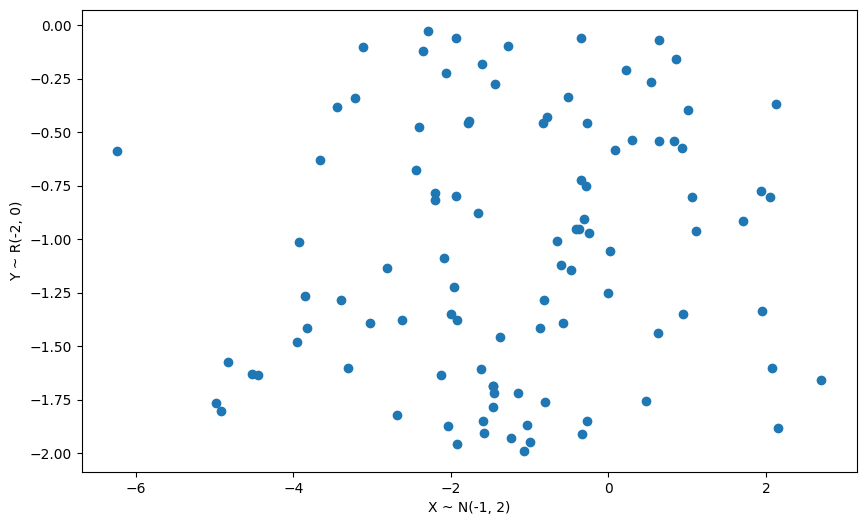

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x=x, y=y)
plt.xlabel('X ~ N(-1, 2)')
plt.ylabel('Y ~ R(-2, 0)')

plt.show()

## 3. Проверка независимости методом таблиц сопряженности  

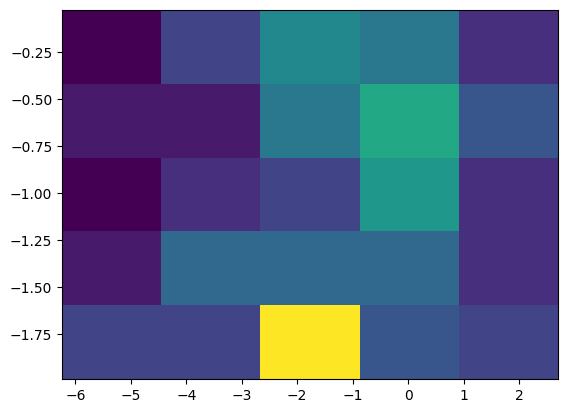

In [19]:
hist = plt.hist2d(x, y, bins=5)

### Таблицы сопряженности

In [22]:
hist[0]

array([[ 3.,  1.,  0.,  1.,  0.],
       [ 3.,  5.,  2.,  1.,  3.],
       [15.,  5.,  3.,  6.,  7.],
       [ 4.,  5.,  8.,  9.,  6.],
       [ 3.,  2.,  2.,  4.,  2.]])

In [23]:
st.chi2_contingency(hist[0])

Chi2ContingencyResult(statistic=18.26101202589298, pvalue=0.3088357538843402, dof=16, expected_freq=array([[ 1.4 ,  0.9 ,  0.75,  1.05,  0.9 ],
       [ 3.92,  2.52,  2.1 ,  2.94,  2.52],
       [10.08,  6.48,  5.4 ,  7.56,  6.48],
       [ 8.96,  5.76,  4.8 ,  6.72,  5.76],
       [ 3.64,  2.34,  1.95,  2.73,  2.34]]))

array([[ 3.,  1.,  0.,  1.,  0.],
       [ 3.,  5.,  2.,  1.,  3.],
       [15.,  5.,  3.,  6.,  7.],
       [ 4.,  5.,  8.,  9.,  6.],
       [ 3.,  2.,  2.,  4.,  2.]])

In [46]:
theor_table = [[0] * len(hist[0]) for i in range(len(hist[0]))]

n_col = [int(np.sum(hist[0].transpose()[row])) for row in range(len(hist[0]))]
n_row = [int(np.sum(hist[0][row])) for row in range(len(hist[0]))]

for i in range(len(n_row)):
  for j in range(len(n_col)):
    theor_table[i][j] = n_row[i] * n_row[j] / n1

In [47]:
theor_table

[[0.25, 0.7, 1.8, 1.6, 0.65],
 [0.7, 1.96, 5.04, 4.48, 1.82],
 [1.8, 5.04, 12.96, 11.52, 4.68],
 [1.6, 4.48, 11.52, 10.24, 4.16],
 [0.65, 1.82, 4.68, 4.16, 1.69]]

## 4. Исследование корелляционной связи

In [83]:
def corr_coeff(x, y, dist_agg, l=0.5):
  rl, pl, tl = [], [], []
  ln = np.linspace(0, 1, 100)

  for i in range(x.shape[0]):
    u = []

    for j in range(y.shape[0]):
      u.append(dist_agg(x[j], y[j], ln[i]))

    rl.append(st.pearsonr(x, u)[0])
    pl.append(st.spearmanr(x, u)[0])
    tl.append(st.kendalltau(x, u)[0])

  return rl, pl, tl




In [84]:
def ema(x_val, y_val, l):
  return l * x_val + (1 - l) * y_val

In [85]:
rl, pl, tl = corr_coeff(x, y, ema)

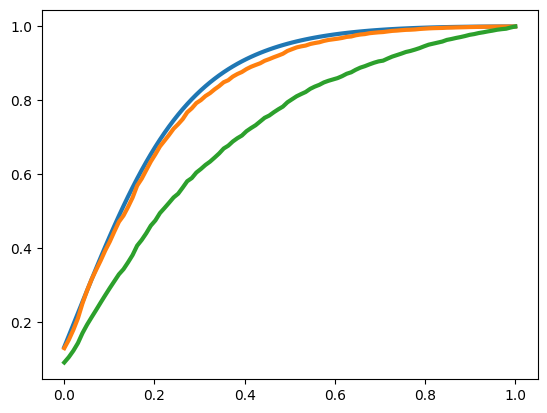

In [86]:
plt.plot(np.linspace(0, 1, n1), rl, lw=3, label="КК по Пирсону")
plt.plot(np.linspace(0, 1, n1), pl, lw=3, label = "КК по Спирмену")
plt.plot(np.linspace(0, 1, n1), tl, lw=3, label = "КК по Кендаллу")

In [87]:
def triplet_ema(x_val, y_val, l):
  return l * x_val ** 3 + (1 - l) * y_val ** 3

In [89]:
rl, pl, tl = corr_coeff(x, y, triplet_ema)

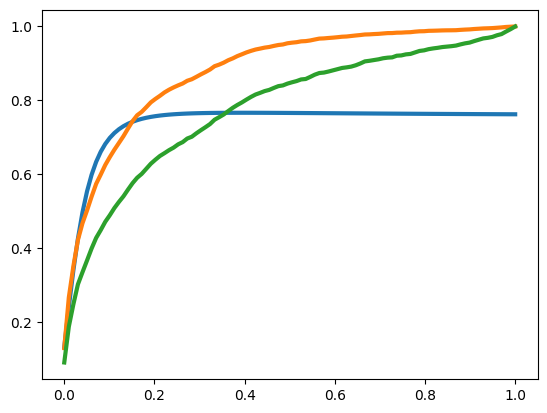

In [90]:
plt.plot(np.linspace(0, 1, n1), rl, lw=3, label="КК по Пирсону")
plt.plot(np.linspace(0, 1, n1), pl, lw=3, label = "КК по Спирмену")
plt.plot(np.linspace(0, 1, n1), tl, lw=3, label = "КК по Кендаллу")

In [91]:
def calculate_v(x, y, l):
  v = []

  for i in range(x.shape[0]):
    v.append(triplet_ema(x[i], y[i], l))

  return v

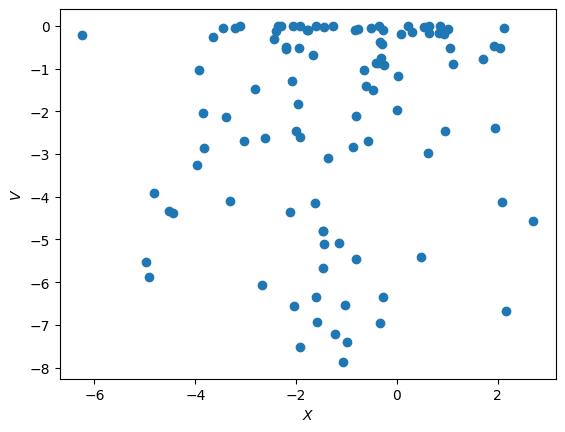

In [92]:
plt.scatter(x, calculate_v(x, y, 0))
plt.ylabel('$V$')
plt.xlabel('$X$')

plt.show()

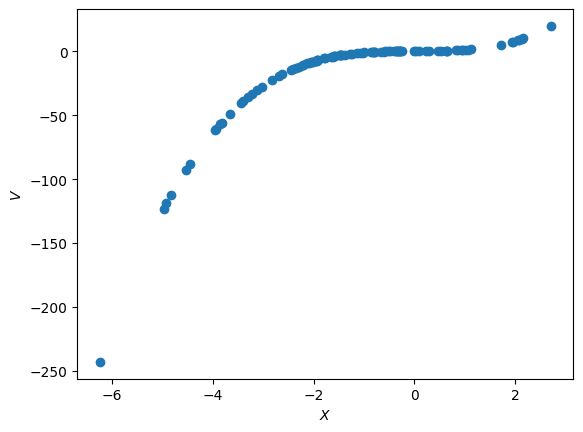

In [93]:
plt.scatter(x, calculate_v(x, y, 1))
plt.ylabel('$V$')
plt.xlabel('$X$')

plt.show()

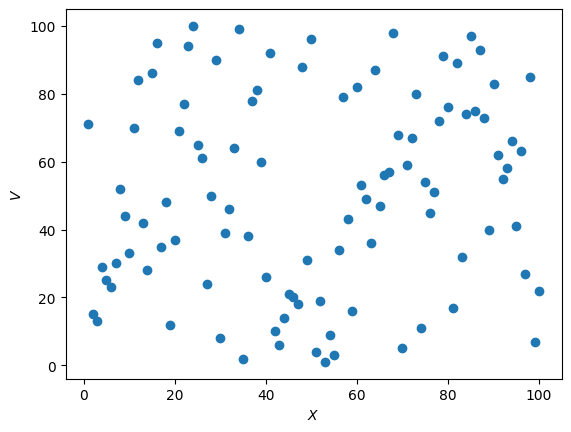

In [94]:
plt.scatter(st.rankdata(x), st.rankdata(calculate_v(x, y, 0)))
plt.ylabel('$V$')
plt.xlabel('$X$')

plt.show()

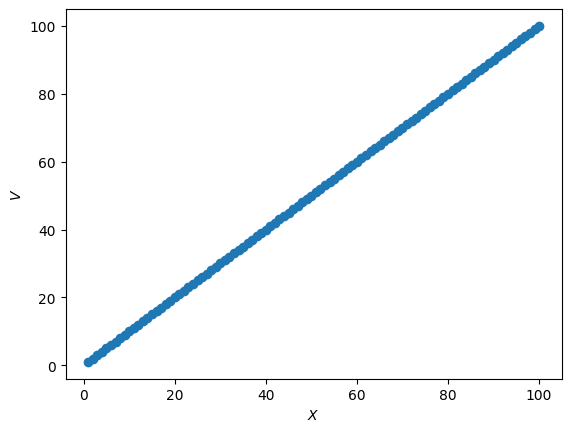

In [95]:
plt.scatter(st.rankdata(x), st.rankdata(calculate_v(x, y, 1)))
plt.ylabel('$V$')
plt.xlabel('$X$')

plt.show()